<a href="https://colab.research.google.com/github/fazliddindehkanoff/CBU-challenge/blob/main/CBU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro**

In [5]:
import pandas as pd
import numpy as np

meta_data = pd.read_csv("/content/application_metadata.csv")
demo_data = pd.read_csv("/content/demographics.csv")
credit_history_data = pd.read_parquet("/content/credit_history.parquet")
financial_ratio_data = pd.read_json("financial_ratios.jsonl", lines=True)
geo_data = pd.read_xml("geographic_data.xml")
loan_data = pd.read_excel("loan_details.xlsx")

In [8]:
meta_data.columns

Index(['customer_ref', 'application_id', 'application_hour',
       'application_day_of_week', 'account_open_year', 'preferred_contact',
       'referral_code', 'account_status_code', 'random_noise_1',
       'num_login_sessions', 'num_customer_service_calls', 'has_mobile_app',
       'paperless_billing', 'default'],
      dtype='object')

In [6]:
demo_data.head()

,cust_id,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents
0,10000,41,$61800,2.2,Full-time,Graduate,Married,2
1,10001,38,"28,600",7.0,FULL_TIME,High School,Married,0
2,10002,18,"$20,700",0.8,FULL_TIME,Bachelor,Single,0
3,10003,27,"31,400",4.8,Full Time,Bachelor,Single,0
4,10004,26,$24600,5.2,Fulltime,High School,Single,0


In [111]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_ref                             89999 non-null  int64  
 1   application_id                           89999 non-null  int64  
 2   application_hour                         89999 non-null  int64  
 3   application_day_of_week                  89999 non-null  int64  
 4   account_open_year                        89999 non-null  int64  
 5   preferred_contact                        89999 non-null  int64  
 6   referral_code                            89999 non-null  object 
 7   account_status_code                      89999 non-null  int64  
 8   random_noise_1                           89999 non-null  float64
 9   num_login_sessions                       89999 non-null  int64  
 10  num_customer_service_calls               89999

In [9]:
demo_data.columns

Index(['cust_id', 'age', 'annual_income', 'employment_length',
       'employment_type', 'education', 'marital_status', 'num_dependents'],
      dtype='object')

In [10]:
credit_history_data.columns

Index(['customer_number', 'credit_score', 'num_credit_accounts',
       'oldest_credit_line_age', 'oldest_account_age_months',
       'total_credit_limit', 'num_delinquencies_2yrs', 'num_inquiries_6mo',
       'recent_inquiry_count', 'num_public_records', 'num_collections',
       'account_diversity_index'],
      dtype='object')

In [11]:
financial_ratio_data.columns

Index(['cust_num', 'monthly_income', 'existing_monthly_debt',
       'monthly_payment', 'debt_to_income_ratio', 'debt_service_ratio',
       'payment_to_income_ratio', 'credit_utilization', 'revolving_balance',
       'credit_usage_amount', 'available_credit', 'total_monthly_debt_payment',
       'annual_debt_payment', 'loan_to_annual_income', 'total_debt_amount',
       'monthly_free_cash_flow'],
      dtype='object')

In [12]:
geo_data.columns

Index(['id', 'state', 'regional_unemployment_rate', 'regional_median_income',
       'regional_median_rent', 'housing_price_index', 'cost_of_living_index',
       'previous_zip_code'],
      dtype='object')

In [13]:
loan_data.columns

Index(['customer_id', 'loan_type', 'loan_amount', 'loan_term', 'interest_rate',
       'loan_purpose', 'loan_to_value_ratio', 'origination_channel',
       'loan_officer_id', 'marketing_campaign'],
      dtype='object')

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          89999 non-null  int64  
 1   loan_type            89999 non-null  object 
 2   loan_amount          89999 non-null  object 
 3   loan_term            89999 non-null  int64  
 4   interest_rate        89999 non-null  float64
 5   loan_purpose         89999 non-null  object 
 6   loan_to_value_ratio  89999 non-null  float64
 7   origination_channel  89999 non-null  object 
 8   loan_officer_id      89999 non-null  int64  
 9   marketing_campaign   89999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.9+ MB


In [25]:
from pprint import pprint
def go_through(df):
  print(f"\n--- Info for DataFrame: {df.name if hasattr(df, 'name') else 'Unnamed DataFrame'} ---")
  df.info()
  print("\n--- Description ---")
  pprint(df.describe())
  print("\n--- Missing Values ---")
  pprint(df.isna().sum())
  print("\n--- Unique Values ---")
  pprint(df.nunique())
  print("\n--- Duplicated Rows ---")
  pprint(df.duplicated().sum())
  print("\n" + "="*70 + "\n")

In [23]:
demo_data.duplicated().sum()

np.int64(0)

In [26]:
for df in [meta_data, demo_data, credit_history_data, financial_ratio_data, geo_data, loan_data]:
  go_through(df)


--- Info for DataFrame: Unnamed DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_ref                89999 non-null  int64  
 1   application_id              89999 non-null  int64  
 2   application_hour            89999 non-null  int64  
 3   application_day_of_week     89999 non-null  int64  
 4   account_open_year           89999 non-null  int64  
 5   preferred_contact           89999 non-null  object 
 6   referral_code               89999 non-null  object 
 7   account_status_code         89999 non-null  object 
 8   random_noise_1              89999 non-null  float64
 9   num_login_sessions          89999 non-null  int64  
 10  num_customer_service_calls  89999 non-null  int64  
 11  has_mobile_app              89999 non-null  int64  
 12  paperless_billing           89999 non-nul

# **Metadata section(Part 1)**

In [37]:
# meta_data['application_day_of_week'].value_counts().sort_index()
# meta_data['account_open_year'].describe()
meta_data['num_login_sessions'].describe()

,num_login_sessions
count,89999.000000
mean,8.814387
std,3.823459
min,1.000000
25%,6.000000
50%,8.000000
75%,11.000000
max,34.000000


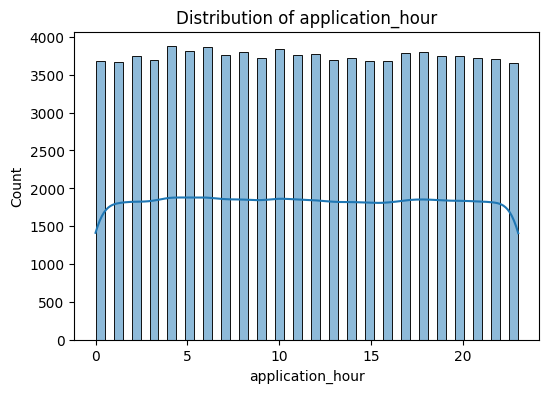

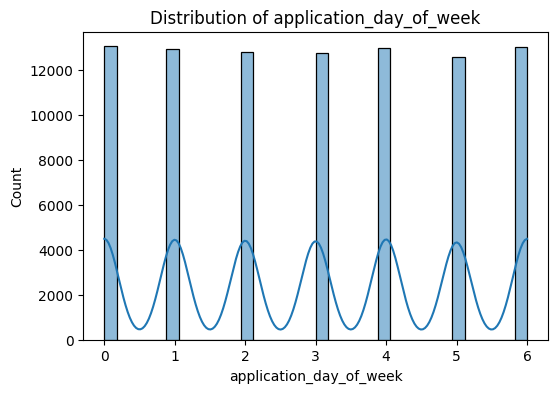

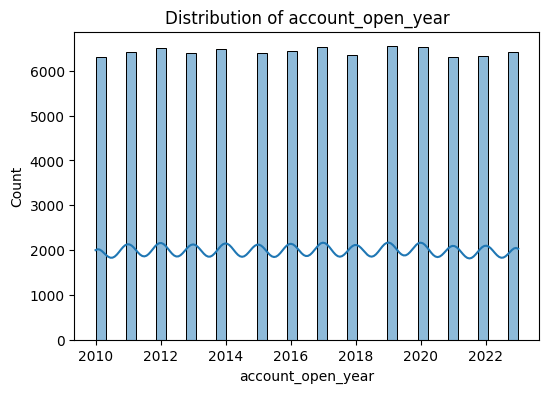

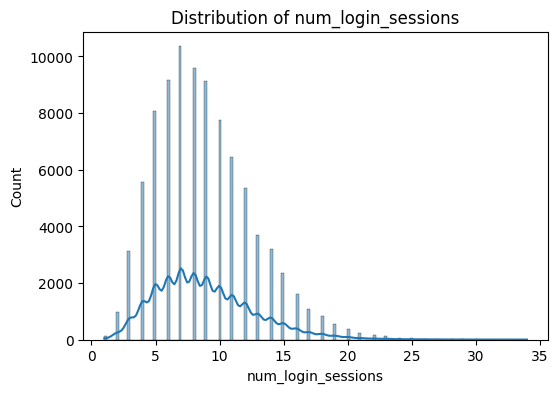

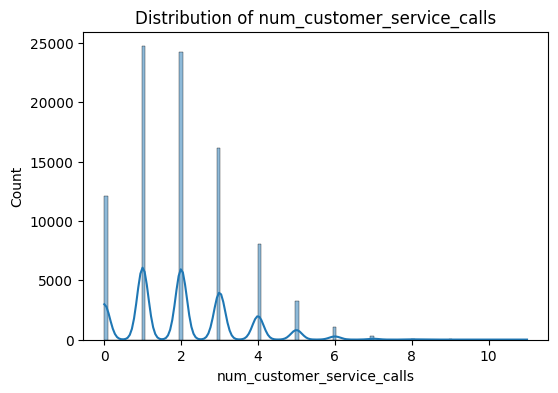

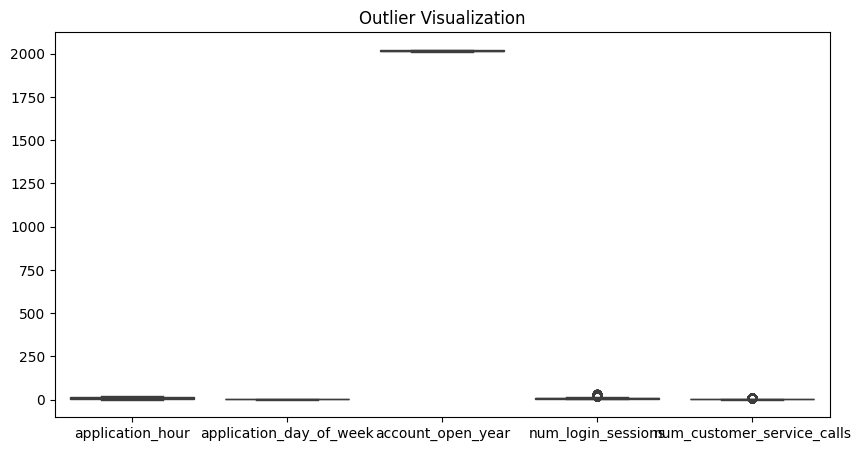

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    'application_hour', 'application_day_of_week',
    'account_open_year', 'num_login_sessions',
    'num_customer_service_calls'
]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(meta_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplot for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=meta_data[numeric_cols])
plt.title("Outlier Visualization")
plt.show()


In [39]:
import pandas as pd

def detect_outliers(df, cols):
    """
    Detects outliers in a list of numeric columns using IQR method.

    Parameters:
        df (pd.DataFrame): DataFrame to analyze
        cols (list): List of numeric columns to check

    Prints outlier summary for each column.
    """
    for col in cols:
        if col not in df.columns:
            print(f"Column '{col}' not found in DataFrame. Skipping...")
            continue

        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Column '{col}' is not numeric. Skipping...")
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        print(f"\nColumn: {col}")
        print(f" - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f" - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f" - Outliers count: {len(outliers)}")
        if len(outliers) > 0:
            print(f" - Outlier values (sample up to 10): {outliers.unique()[:10]}")
        else:
            print(" - No outliers detected.")


In [54]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['account_status_code', 'preferred_contact']

for col in categorical_cols:
    le = LabelEncoder()
    meta_data[col] = le.fit_transform(meta_data[col])

In [55]:
meta_data['account_status_code'].value_counts()

,count
account_status_code,
1,18118
4,18093
0,18081
2,17989
3,17718


In [44]:
numeric_cols = ['application_hour', 'application_day_of_week',
                'account_open_year', 'num_login_sessions',
                'num_customer_service_calls','account_status_code','paperless_billing']

detect_outliers(meta_data, numeric_cols)



Column: application_hour
 - Q1: 6.0, Q3: 17.0, IQR: 11.0
 - Lower Bound: -10.5, Upper Bound: 33.5
 - Outliers count: 0
 - No outliers detected.

Column: application_day_of_week
 - Q1: 1.0, Q3: 5.0, IQR: 4.0
 - Lower Bound: -5.0, Upper Bound: 11.0
 - Outliers count: 0
 - No outliers detected.

Column: account_open_year
 - Q1: 2013.0, Q3: 2020.0, IQR: 7.0
 - Lower Bound: 2002.5, Upper Bound: 2030.5
 - Outliers count: 0
 - No outliers detected.

Column: num_login_sessions
 - Q1: 6.0, Q3: 11.0, IQR: 5.0
 - Lower Bound: -1.5, Upper Bound: 18.5
 - Outliers count: 1604
 - Outlier values (sample up to 10): [23 22 20 19 21 27 25 26 28 24]

Column: num_customer_service_calls
 - Q1: 1.0, Q3: 3.0, IQR: 2.0
 - Lower Bound: -2.0, Upper Bound: 6.0
 - Outliers count: 397
 - Outlier values (sample up to 10): [ 7  8  9 11 10]
Column 'account_status_code' is not numeric. Skipping...


In [52]:
import numpy as np

def detect_outliers_modified_z(df, cols, threshold=3.5):
    """
    Detect outliers using the Modified Z-score method.

    Parameters:
        df (pd.DataFrame): DataFrame to analyze
        cols (list): List of numeric columns
        threshold (float): cutoff for outliers (default 3.5)
    """
    for col in cols:
        if col not in df.columns:
            print(f"Column '{col}' not found. Skipping...")
            continue

        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Column '{col}' is not numeric. Skipping...")
            continue

        median = df[col].median()
        MAD = np.median(np.abs(df[col] - median))

        if MAD == 0:
            print(f"\nColumn: {col} → MAD is 0, cannot compute Modified Z-score reliably.")
            continue

        modified_z = 0.6745 * (df[col] - median) / MAD
        outliers = df[np.abs(modified_z) > threshold][col]

        print(f"\nColumn: {col}")
        print(f" - Median: {median}, MAD: {MAD}")
        print(f" - Outliers count: {len(outliers)}")
        if len(outliers) > 0:
            print(f" - Outlier values (sample up to 10): {outliers.unique()[:10]}")
        else:
            print(" - No outliers detected.")


In [56]:
numeric_cols = ['application_hour', 'application_day_of_week',
                'account_open_year', 'num_login_sessions',
                'num_customer_service_calls', 'account_status_code', 'preferred_contact']

detect_outliers_modified_z(meta_data, numeric_cols)



Column: application_hour
 - Median: 11.0, MAD: 6.0
 - Outliers count: 0
 - No outliers detected.

Column: application_day_of_week
 - Median: 3.0, MAD: 2.0
 - Outliers count: 0
 - No outliers detected.

Column: account_open_year
 - Median: 2017.0, MAD: 3.0
 - Outliers count: 0
 - No outliers detected.

Column: num_login_sessions
 - Median: 8.0, MAD: 2.0
 - Outliers count: 1604
 - Outlier values (sample up to 10): [23 22 20 19 21 27 25 26 28 24]

Column: num_customer_service_calls
 - Median: 2.0, MAD: 1.0
 - Outliers count: 106
 - Outlier values (sample up to 10): [ 8  9 11 10]

Column: account_status_code
 - Median: 2.0, MAD: 1.0
 - Outliers count: 0
 - No outliers detected.

Column: preferred_contact → MAD is 0, cannot compute Modified Z-score reliably.


In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def clean_numeric_metadata(df, cols, clip_lower=0.01, clip_upper=0.99, log_transform=False, normalize=None):
    """
    Cleans numeric metadata columns by:
    - Clipping outliers
    - Optional log-transform
    - Optional normalization (MinMax or Z-score)

    Parameters:
        df (pd.DataFrame): Input DataFrame
        cols (list): List of numeric columns to process
        clip_lower (float): Lower percentile for clipping
        clip_upper (float): Upper percentile for clipping
        log_transform (bool): Apply log1p transformation
        normalize (str or None): 'minmax' or 'zscore' for normalization

    Returns:
        df_copy (pd.DataFrame): DataFrame with cleaned numeric columns
    """
    df_copy = df.copy()

    # Step 1: Clip extreme outliers
    for col in cols:
        lower = df_copy[col].quantile(clip_lower)
        upper = df_copy[col].quantile(clip_upper)
        df_copy[col] = df_copy[col].clip(lower, upper)

    # Step 2: Optional log-transform
    if log_transform:
        for col in cols:
            df_copy[col] = np.log1p(df_copy[col])

    # Step 3: Optional normalization
    if normalize == 'minmax':
        scaler = MinMaxScaler()
        df_copy[cols] = scaler.fit_transform(df_copy[cols])
    elif normalize == 'zscore':
        scaler = StandardScaler()
        df_copy[cols] = scaler.fit_transform(df_copy[cols])

    return df_copy


In [75]:
numeric_cols = ['num_login_sessions', 'num_customer_service_calls']

# For tree-based models: clip only
metadata_cleaned = clean_numeric_metadata(meta_data, numeric_cols, log_transform=False, normalize=None)

# For neural networks or linear models: clip + log + minmax
# metadata_cleaned_nn = clean_numeric_metadata(meta_data, numeric_cols, log_transform=True, normalize='minmax')


In [76]:
# meta_data['num_login_sessions'].value_counts()

In [77]:
detect_outliers(metadata_cleaned, numeric_cols)


Column: num_login_sessions
 - Q1: 6.0, Q3: 11.0, IQR: 5.0
 - Lower Bound: -1.5, Upper Bound: 18.5
 - Outliers count: 1604
 - Outlier values (sample up to 10): [20 19]

Column: num_customer_service_calls
 - Q1: 1.0, Q3: 3.0, IQR: 2.0
 - Lower Bound: -2.0, Upper Bound: 6.0
 - Outliers count: 0
 - No outliers detected.


In [82]:
metadata_cleaned['num_login_sessions'].value_counts()

,count
num_login_sessions,
7,10359
8,9601
6,9151
9,9134
5,8065
10,7748
11,6437
4,5556
12,5356


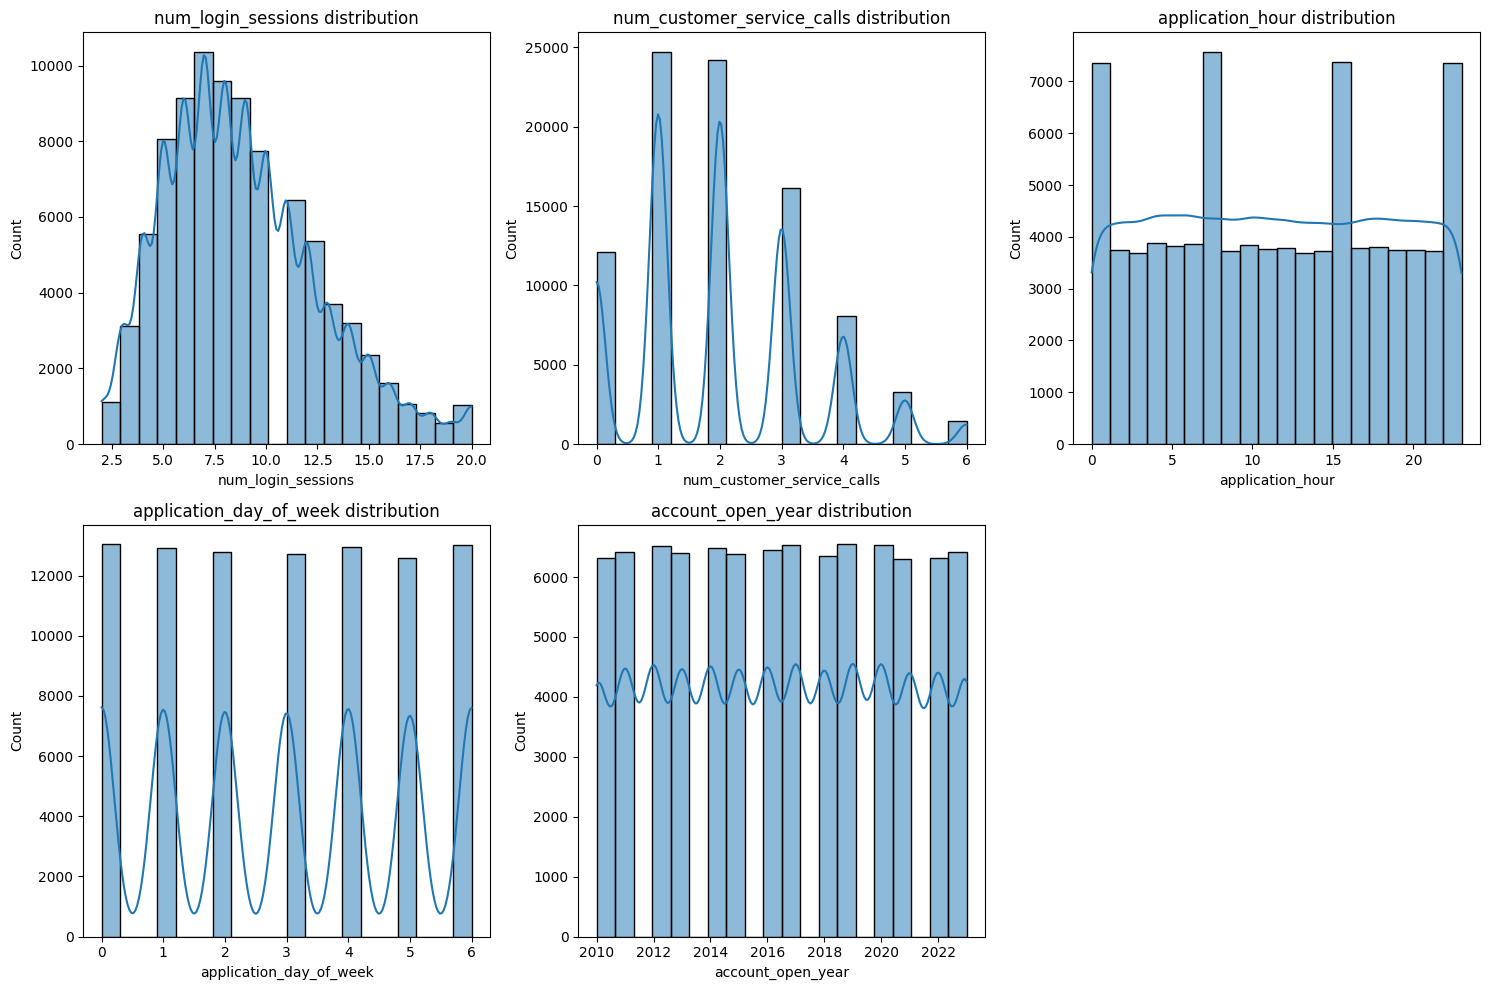

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['num_login_sessions', 'num_customer_service_calls',
                'application_hour', 'application_day_of_week', 'account_open_year']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(metadata_cleaned[col], bins=20, kde=True)
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()


In [97]:
numeric_cols.append('default')

In [100]:
numeric_cols

['num_login_sessions',
 'num_customer_service_calls',
 'application_hour',
 'application_day_of_week',
 'account_open_year',
 'default']

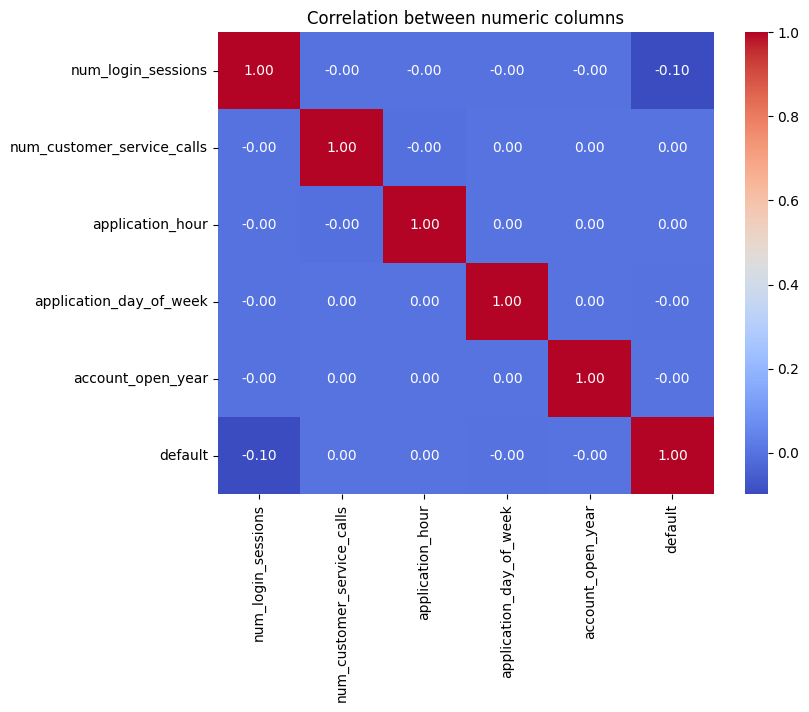

In [101]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(metadata_cleaned[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation between numeric columns')
plt.show()


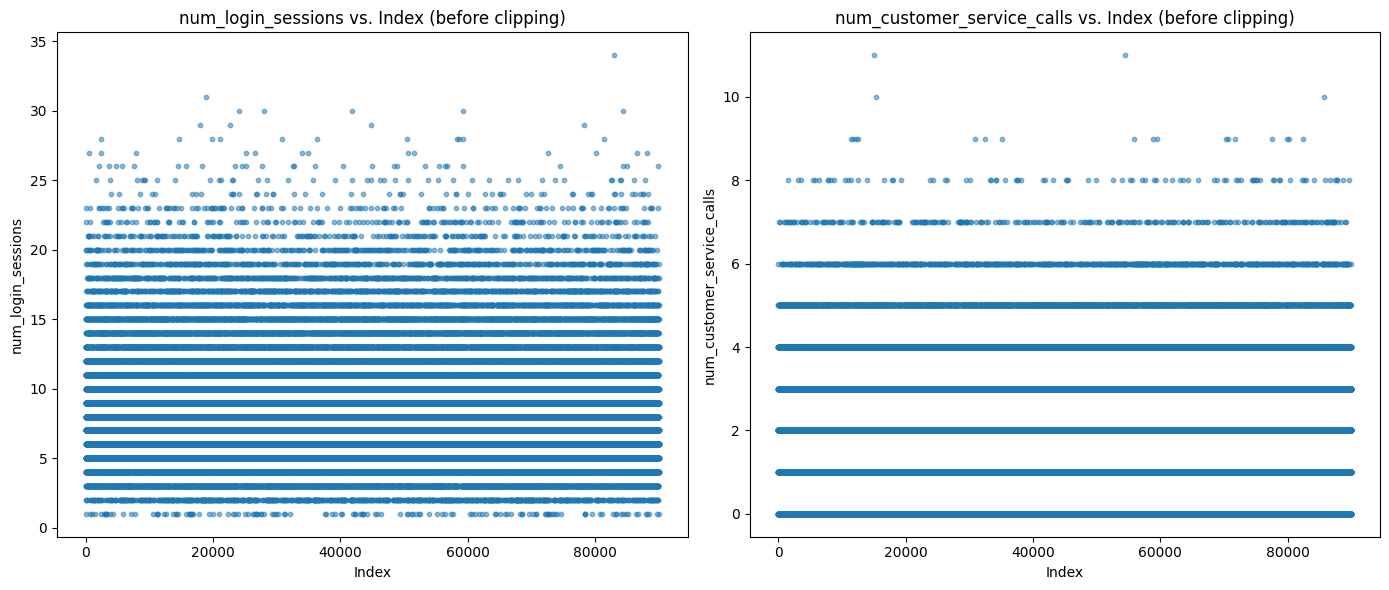

In [141]:
import matplotlib.pyplot as plt

# Columns to visualize
cols_to_plot = ['num_login_sessions', 'num_customer_service_calls']

plt.figure(figsize=(14,6))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 2, i)
    plt.scatter(meta_data.index, meta_data[col], alpha=0.5, s=10)
    plt.title(f'{col} vs. Index (before clipping)')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


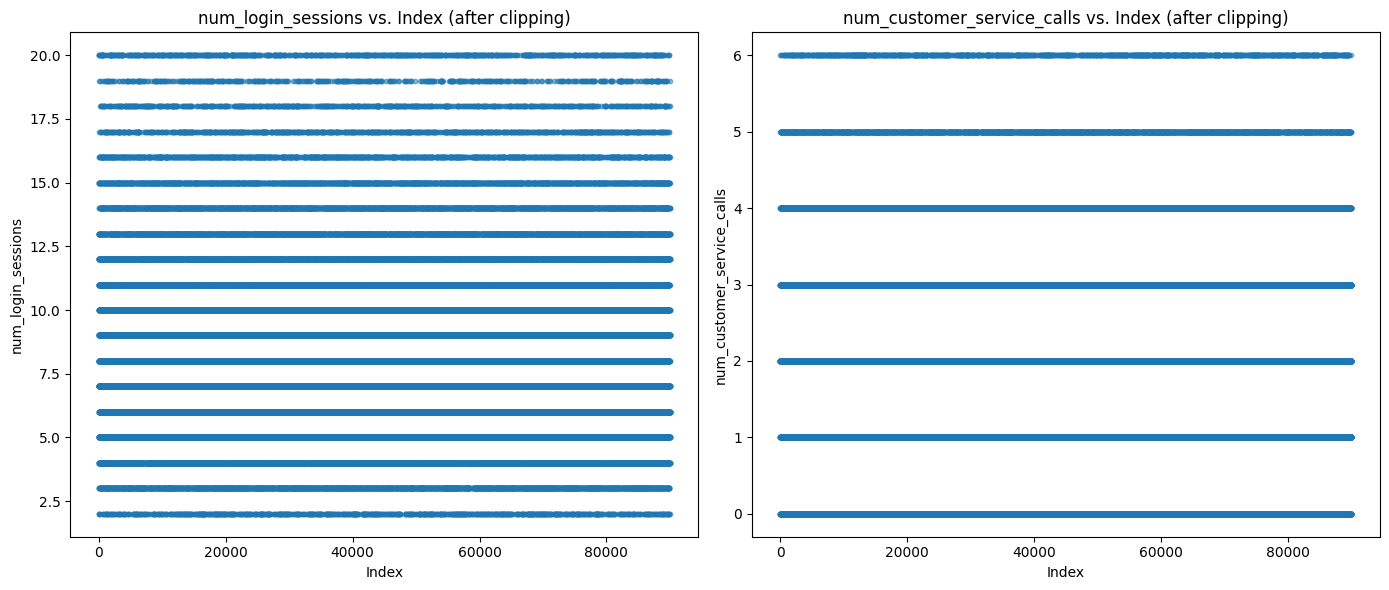

In [105]:
import matplotlib.pyplot as plt

# Columns to visualize
cols_to_plot = ['num_login_sessions', 'num_customer_service_calls']

plt.figure(figsize=(14,6))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 2, i)
    plt.scatter(meta_data.index, metadata_cleaned[col], alpha=0.5, s=10)
    plt.title(f'{col} vs. Index (after clipping)')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [107]:
strong_cols = [
    'num_login_sessions',
    'num_customer_service_calls',
    'account_status_code',
    'paperless_billing',
    'has_mobile_app',
    'account_open_year'
]
helper_cols = [
    'preferred_contact',
    'application_hour',
    'application_day_of_week'
]
selected_cols = strong_cols + helper_cols + ['default']  # Keep target as well


In [121]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_ref                             89999 non-null  int64  
 1   application_id                           89999 non-null  int64  
 2   application_hour                         89999 non-null  int64  
 3   application_day_of_week                  89999 non-null  int64  
 4   account_open_year                        89999 non-null  int64  
 5   preferred_contact                        89999 non-null  int64  
 6   referral_code                            89999 non-null  object 
 7   account_status_code                      89999 non-null  int64  
 8   random_noise_1                           89999 non-null  float64
 9   num_login_sessions                       89999 non-null  int64  
 10  num_customer_service_calls               89999

# **For merging**

In [108]:
metadata_selected = metadata_cleaned[selected_cols].copy()


In [192]:
metadata_selected.columns

Index(['num_login_sessions', 'num_customer_service_calls',
       'account_status_code', 'paperless_billing', 'has_mobile_app',
       'account_open_year', 'preferred_contact', 'application_hour',
       'application_day_of_week', 'default'],
      dtype='object')

In [120]:
metadata_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   num_login_sessions          89999 non-null  int64
 1   num_customer_service_calls  89999 non-null  int64
 2   account_status_code         89999 non-null  int64
 3   paperless_billing           89999 non-null  int64
 4   has_mobile_app              89999 non-null  int64
 5   account_open_year           89999 non-null  int64
 6   preferred_contact           89999 non-null  int64
 7   application_hour            89999 non-null  int64
 8   application_day_of_week     89999 non-null  int64
 9   default                     89999 non-null  int64
dtypes: int64(10)
memory usage: 6.9 MB


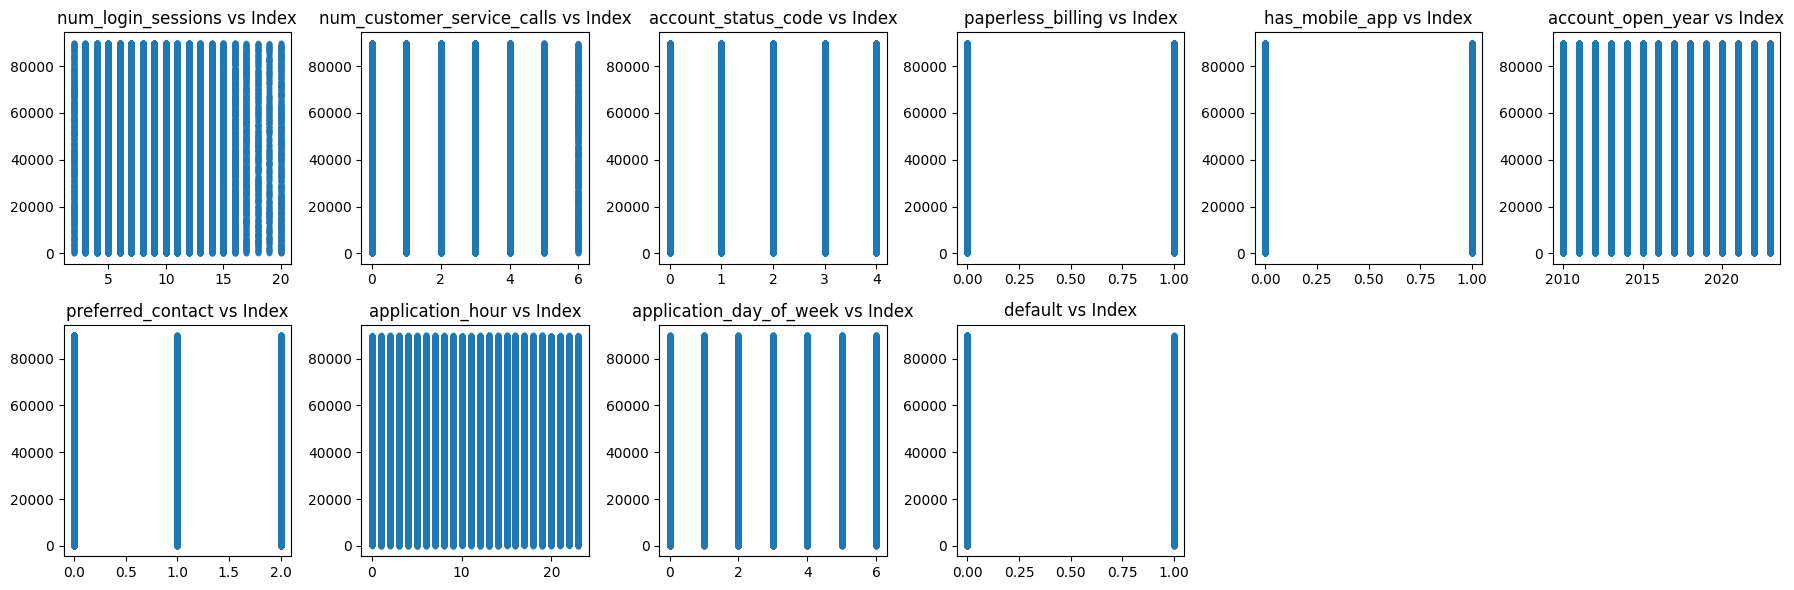

In [126]:
plt.figure(figsize=(18, 6))
for i, col in enumerate(metadata_selected.columns, 1):
    plt.subplot(2, 6, i)
    plt.scatter(metadata_selected[col],metadata_selected.index, s=10, alpha=0.5)
    plt.title(f'{col} vs Index')
plt.tight_layout()
plt.show()


In [207]:
metadata_selected['customer_id'] = meta_data['customer_ref']

In [208]:
metadata_selected.to_csv('metadata_final.csv')

# **Credit History(Part 2)**

In [162]:
credit_data = pd.read_parquet("/content/credit_history.parquet")


In [163]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_number            89999 non-null  int64  
 1   credit_score               89999 non-null  int64  
 2   num_credit_accounts        89999 non-null  int64  
 3   oldest_credit_line_age     89999 non-null  float64
 4   oldest_account_age_months  89999 non-null  float64
 5   total_credit_limit         89999 non-null  float64
 6   num_delinquencies_2yrs     89167 non-null  float64
 7   num_inquiries_6mo          89999 non-null  int64  
 8   recent_inquiry_count       89999 non-null  int64  
 9   num_public_records         89999 non-null  int64  
 10  num_collections            89999 non-null  int64  
 11  account_diversity_index    89999 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 8.2 MB


In [164]:
credit_data.columns

Index(['customer_number', 'credit_score', 'num_credit_accounts',
       'oldest_credit_line_age', 'oldest_account_age_months',
       'total_credit_limit', 'num_delinquencies_2yrs', 'num_inquiries_6mo',
       'recent_inquiry_count', 'num_public_records', 'num_collections',
       'account_diversity_index'],
      dtype='object')

In [165]:
# Strongest predictive columns
strong_cols = [
    'credit_score',
    'oldest_credit_line_age',
    'oldest_account_age_months',
    'num_delinquencies_2yrs',
    'num_public_records',
    'num_collections'
]

# Helper / secondary columns
helper_cols = [
    'num_credit_accounts',
    'total_credit_limit',
    'num_inquiries_6mo',
    'recent_inquiry_count',
    'account_diversity_index'
]

# Combine selected columns
selected_cols = strong_cols + helper_cols

# Copy selected columns into a new DataFrame
credit_selected = credit_data[selected_cols].copy()


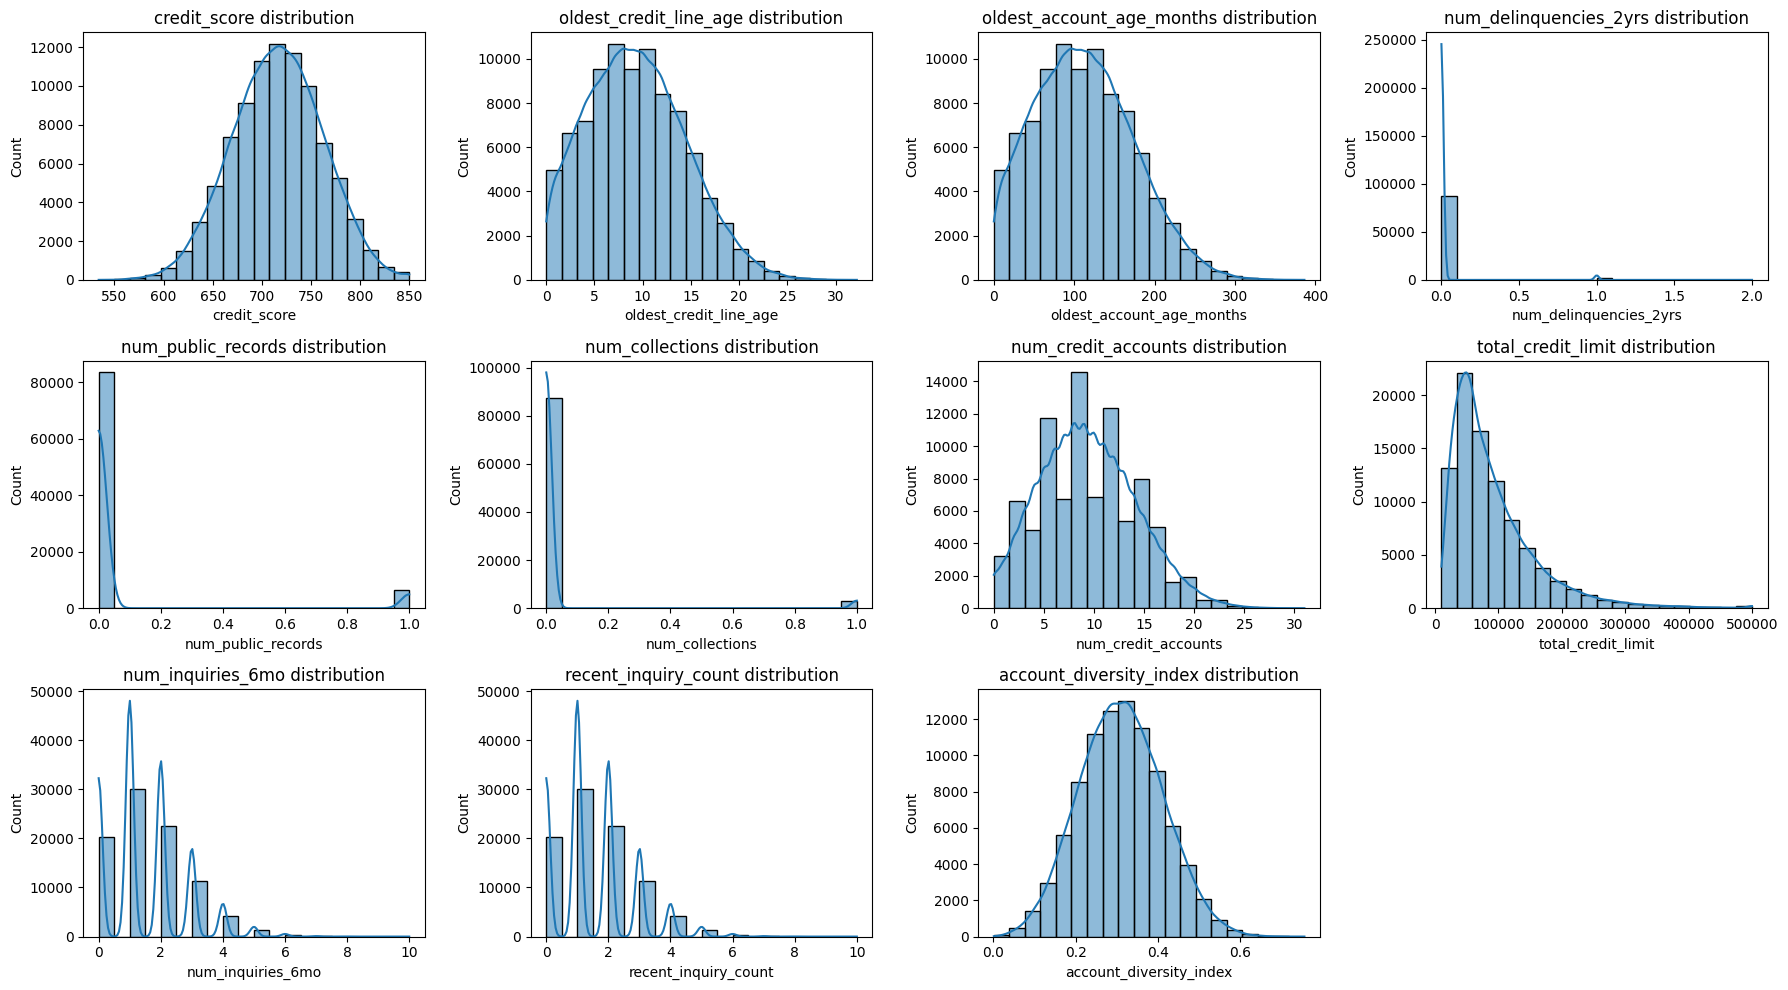

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))
for i, col in enumerate(credit_selected.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(credit_selected[col], bins=20, kde=True)
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()


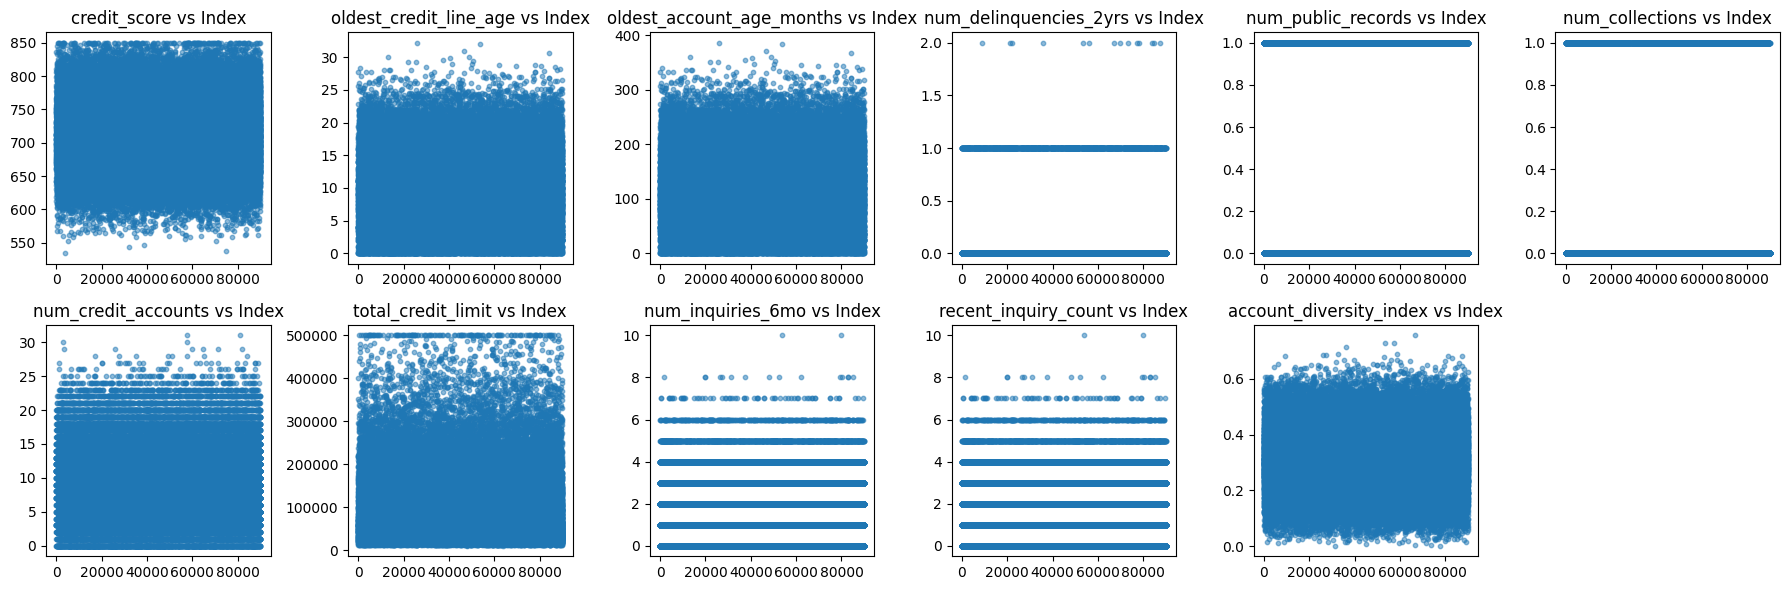

In [167]:
plt.figure(figsize=(18, 6))
for i, col in enumerate(credit_selected.columns, 1):
    plt.subplot(2, 6, i)
    plt.scatter(credit_selected.index, credit_selected[col], s=10, alpha=0.5)
    plt.title(f'{col} vs Index')
plt.tight_layout()
plt.show()


In [168]:
def detect_outliers_iqr(df, cols):
    """
    Detect outliers in numeric columns using IQR method.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        cols (list): Columns to check for outliers

    Returns:
        None: Prints outlier report per column
    """
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(f"Column: {col}")
        print(f" - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f" - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f" - Outliers count: {len(outliers)}")
        if len(outliers) > 0:
            print(f" - Outlier values (sample up to 10): {outliers.unique()[:10]}")
        else:
            print(" - No outliers detected.")
        print("\n")


In [169]:
# Detect outliers in credit history numeric columns
detect_outliers_iqr(credit_selected, credit_selected.columns)


Column: credit_score
 - Q1: 685.0, Q3: 748.0, IQR: 63.0
 - Lower Bound: 590.5, Upper Bound: 842.5
 - Outliers count: 487
 - Outlier values (sample up to 10): [846 575 590 567 585 850 580 586 587 847]


Column: oldest_credit_line_age
 - Q1: 5.4, Q3: 12.9, IQR: 7.5
 - Lower Bound: -5.85, Upper Bound: 24.15
 - Outliers count: 280
 - Outlier values (sample up to 10): [25.6 27.7 25.  26.1 25.5 28.4 24.8 27.2 24.7 25.3]


Column: oldest_account_age_months
 - Q1: 64.80000000000001, Q3: 154.8, IQR: 90.0
 - Lower Bound: -70.19999999999999, Upper Bound: 289.8
 - Outliers count: 280
 - Outlier values (sample up to 10): [307.2 332.4 300.  313.2 306.  340.8 297.6 326.4 296.4 303.6]


Column: num_delinquencies_2yrs
 - Q1: 0.0, Q3: 0.0, IQR: 0.0
 - Lower Bound: 0.0, Upper Bound: 0.0
 - Outliers count: 1709
 - Outlier values (sample up to 10): [1. 2.]


Column: num_public_records
 - Q1: 0.0, Q3: 0.0, IQR: 0.0
 - Lower Bound: 0.0, Upper Bound: 0.0
 - Outliers count: 6535
 - Outlier values (sample up to

In [170]:
def clip_outliers(df, cols, lower_pct=0.01, upper_pct=0.99):
    """
    Clip extreme outliers in numeric columns based on given percentiles.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        cols (list): Columns to clip
        lower_pct (float): Lower percentile (default 1%)
        upper_pct (float): Upper percentile (default 99%)

    Returns:
        pd.DataFrame: Copy of df with clipped columns
    """
    df_copy = df.copy()
    for col in cols:
        lower = df_copy[col].quantile(lower_pct)
        upper = df_copy[col].quantile(upper_pct)
        df_copy[col] = df_copy[col].clip(lower, upper)
        print(f"Clipping {col}: lower={lower}, upper={upper}")
    return df_copy


In [171]:
numeric_cols = credit_selected.columns.tolist()

# Clip outliers
credit_clipped = clip_outliers(credit_selected, numeric_cols)


Clipping credit_score: lower=610.0, upper=821.0
Clipping oldest_credit_line_age: lower=0.0, upper=22.0
Clipping oldest_account_age_months: lower=0.0, upper=264.0
Clipping num_delinquencies_2yrs: lower=0.0, upper=1.0
Clipping num_public_records: lower=0.0, upper=1.0
Clipping num_collections: lower=0.0, upper=1.0
Clipping num_credit_accounts: lower=0.0, upper=21.0
Clipping total_credit_limit: lower=15000.0, upper=344900.0
Clipping num_inquiries_6mo: lower=0.0, upper=5.0
Clipping recent_inquiry_count: lower=0.0, upper=5.0
Clipping account_diversity_index: lower=0.09, upper=0.549


In [173]:
credit_clipped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score               89999 non-null  int64  
 1   oldest_credit_line_age     89999 non-null  float64
 2   oldest_account_age_months  89999 non-null  float64
 3   num_delinquencies_2yrs     89167 non-null  float64
 4   num_public_records         89999 non-null  int64  
 5   num_collections            89999 non-null  int64  
 6   num_credit_accounts        89999 non-null  int64  
 7   total_credit_limit         89999 non-null  float64
 8   num_inquiries_6mo          89999 non-null  int64  
 9   recent_inquiry_count       89999 non-null  int64  
 10  account_diversity_index    89999 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 7.6 MB


In [174]:
detect_outliers_iqr(credit_clipped, credit_selected.columns)


Column: credit_score
 - Q1: 685.0, Q3: 748.0, IQR: 63.0
 - Lower Bound: 590.5, Upper Bound: 842.5
 - Outliers count: 0
 - No outliers detected.


Column: oldest_credit_line_age
 - Q1: 5.4, Q3: 12.9, IQR: 7.5
 - Lower Bound: -5.85, Upper Bound: 24.15
 - Outliers count: 0
 - No outliers detected.


Column: oldest_account_age_months
 - Q1: 64.80000000000001, Q3: 154.8, IQR: 90.0
 - Lower Bound: -70.19999999999999, Upper Bound: 289.8
 - Outliers count: 0
 - No outliers detected.


Column: num_delinquencies_2yrs
 - Q1: 0.0, Q3: 0.0, IQR: 0.0
 - Lower Bound: 0.0, Upper Bound: 0.0
 - Outliers count: 1709
 - Outlier values (sample up to 10): [1.]


Column: num_public_records
 - Q1: 0.0, Q3: 0.0, IQR: 0.0
 - Lower Bound: 0.0, Upper Bound: 0.0
 - Outliers count: 6535
 - Outlier values (sample up to 10): [1]


Column: num_collections
 - Q1: 0.0, Q3: 0.0, IQR: 0.0
 - Lower Bound: 0.0, Upper Bound: 0.0
 - Outliers count: 2808
 - Outlier values (sample up to 10): [1]


Column: num_credit_accounts
 -

In [148]:
credit_clipped.columns

Index(['credit_score', 'oldest_credit_line_age', 'oldest_account_age_months',
       'num_delinquencies_2yrs', 'num_public_records', 'num_collections',
       'num_credit_accounts', 'total_credit_limit', 'num_inquiries_6mo',
       'recent_inquiry_count', 'account_diversity_index'],
      dtype='object')

In [138]:
credit_clipped['num_delinquencies_2yrs'].fillna(1.0, inplace=True)

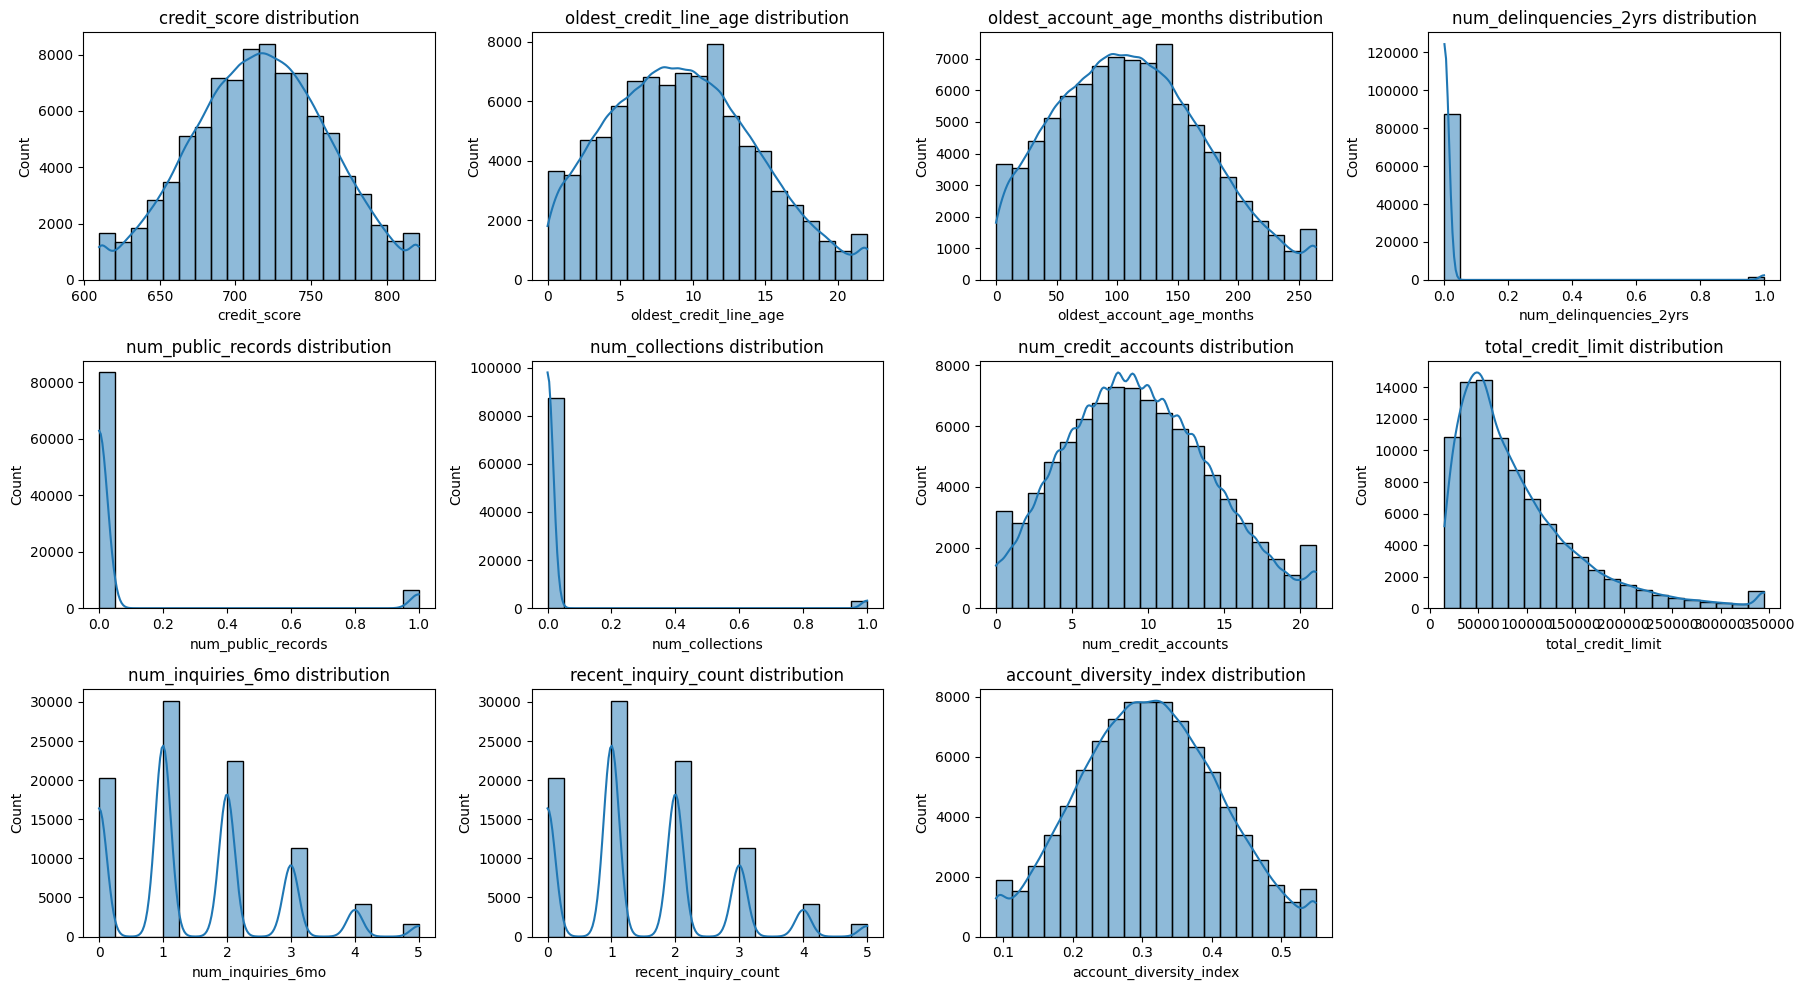

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))
for i, col in enumerate(credit_selected.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(credit_clipped[col], bins=20, kde=True)
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()


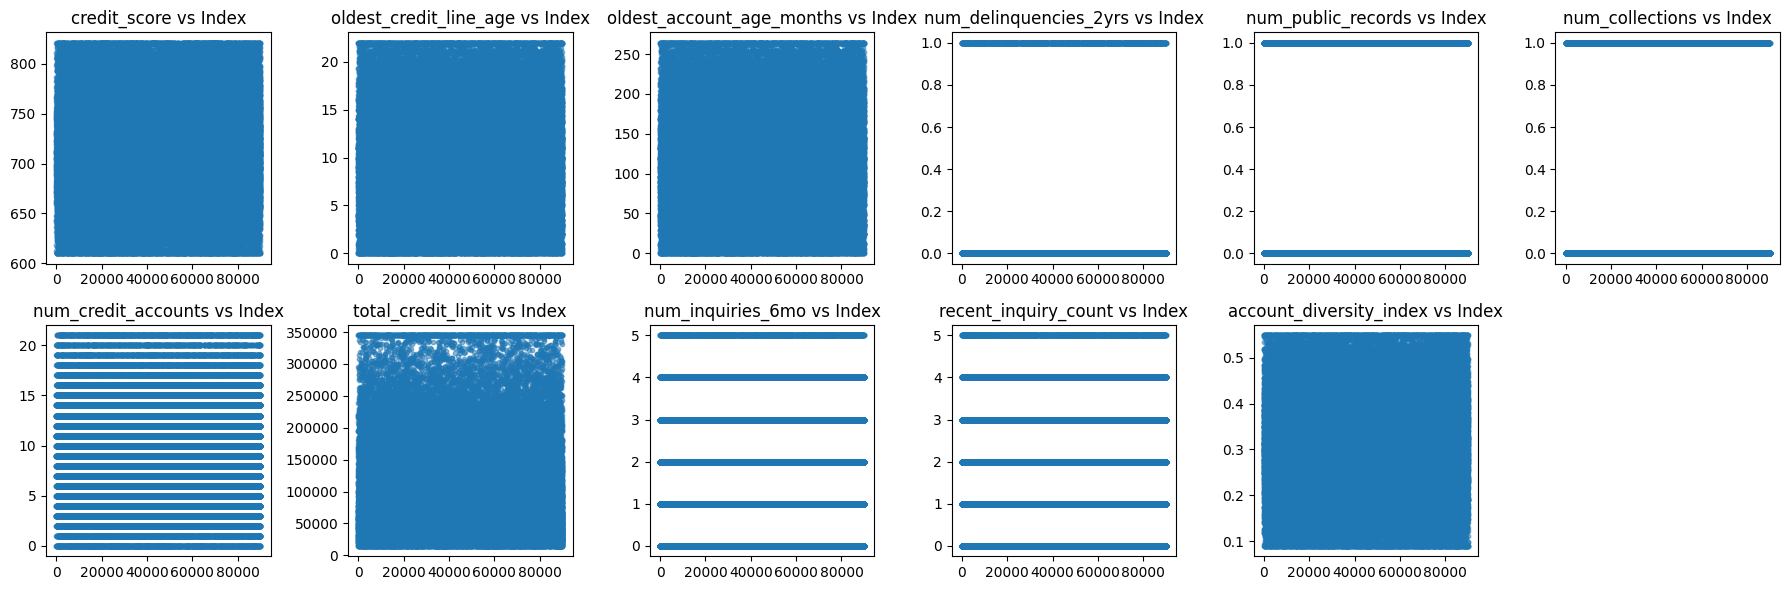

In [176]:
plt.figure(figsize=(18, 6))
for i, col in enumerate(credit_selected.columns, 1):
    plt.subplot(2, 6, i)
    plt.scatter(credit_selected.index, credit_clipped[col], s=10, alpha=0.5)
    plt.title(f'{col} vs Index')
plt.tight_layout()
plt.show()


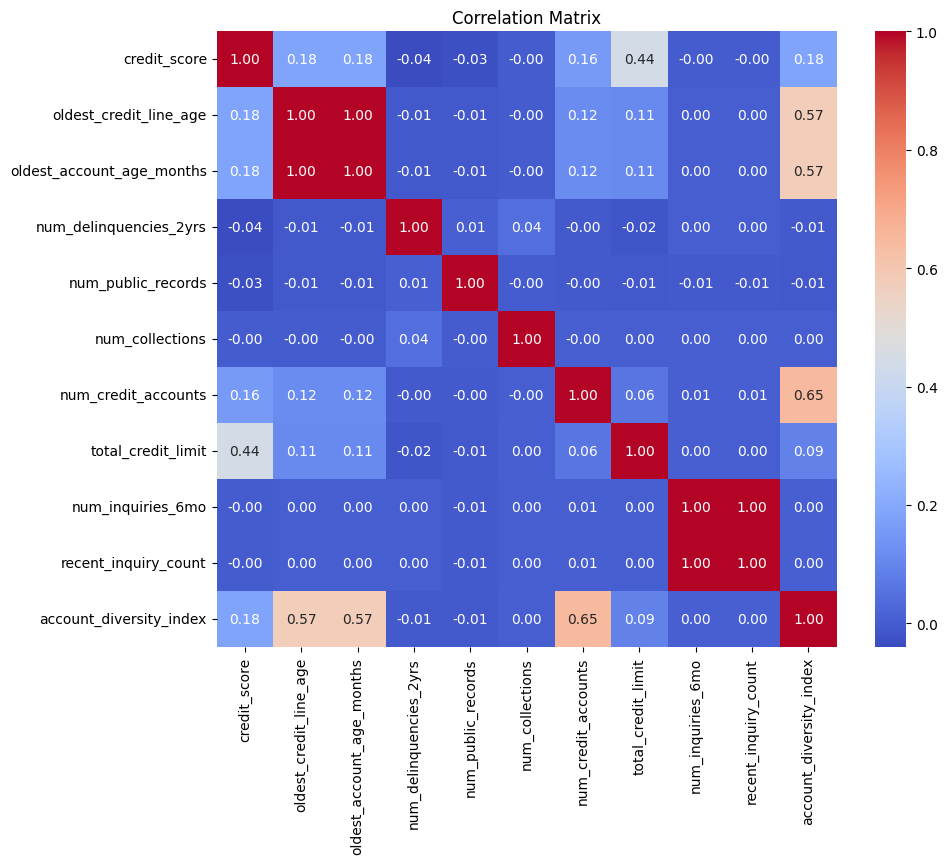

In [177]:
plt.figure(figsize=(10,8))
sns.heatmap(credit_clipped.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [178]:
credit_clipped['total_delinquencies'] = (
    credit_clipped['num_delinquencies_2yrs'] +
    credit_clipped['num_public_records'] +
    credit_clipped['num_collections']
)


In [179]:
# Avoid division by zero
credit_clipped['credit_utilization_ratio'] = credit_clipped['total_credit_limit'] / credit_clipped['num_credit_accounts'].replace(0,1)
credit_clipped['recent_inquiry_ratio'] = credit_clipped['recent_inquiry_count'] / credit_clipped['num_credit_accounts'].replace(0,1)


In [160]:
# # Credit Score bands: Low / Medium / High
# credit_clipped['credit_score_band'] = pd.cut(
#     credit_clipped['credit_score'],
#     bins=[300, 600, 700, 850],
#     labels=['Low', 'Medium', 'High']
# )

# # Oldest credit line age bands (years)
# credit_clipped['oldest_credit_line_age_band'] = pd.cut(
#     credit_clipped['oldest_credit_line_age'],
#     bins=[0,5,10,20,30],
#     labels=[1,2,3,4]
# )


In [180]:
credit_clipped

,credit_score,oldest_credit_line_age,oldest_account_age_months,num_delinquencies_2yrs,num_public_records,num_collections,num_credit_accounts,total_credit_limit,num_inquiries_6mo,recent_inquiry_count,account_diversity_index,total_delinquencies,credit_utilization_ratio,recent_inquiry_ratio
0,696,22.0,264.0,0.0,1,0,14,169100.0,2,2,0.499,1.0,12078.571429,0.142857
1,659,3.5,42.0,0.0,0,0,13,78200.0,5,5,0.298,0.0,6015.384615,0.384615
2,662,0.0,0.0,0.0,0,0,3,41400.0,2,2,0.174,0.0,13800.000000,0.666667
3,676,9.0,108.0,0.0,0,0,8,60000.0,1,1,0.263,0.0,7500.000000,0.125000
4,678,8.0,96.0,0.0,0,0,7,49700.0,1,1,0.298,0.0,7100.000000,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,817,8.2,98.4,0.0,0,0,10,135600.0,1,1,0.285,0.0,13560.000000,0.100000
89995,745,8.8,105.6,0.0,0,0,9,44600.0,1,1,0.353,0.0,4955.555556,0.111111
89996,610,1.0,12.0,0.0,1,0,11,18300.0,2,2,0.238,1.0,1663.636364,0.181818
89997,678,3.0,36.0,0.0,0,0,10,54300.0,3,3,0.227,0.0,5430.000000,0.300000


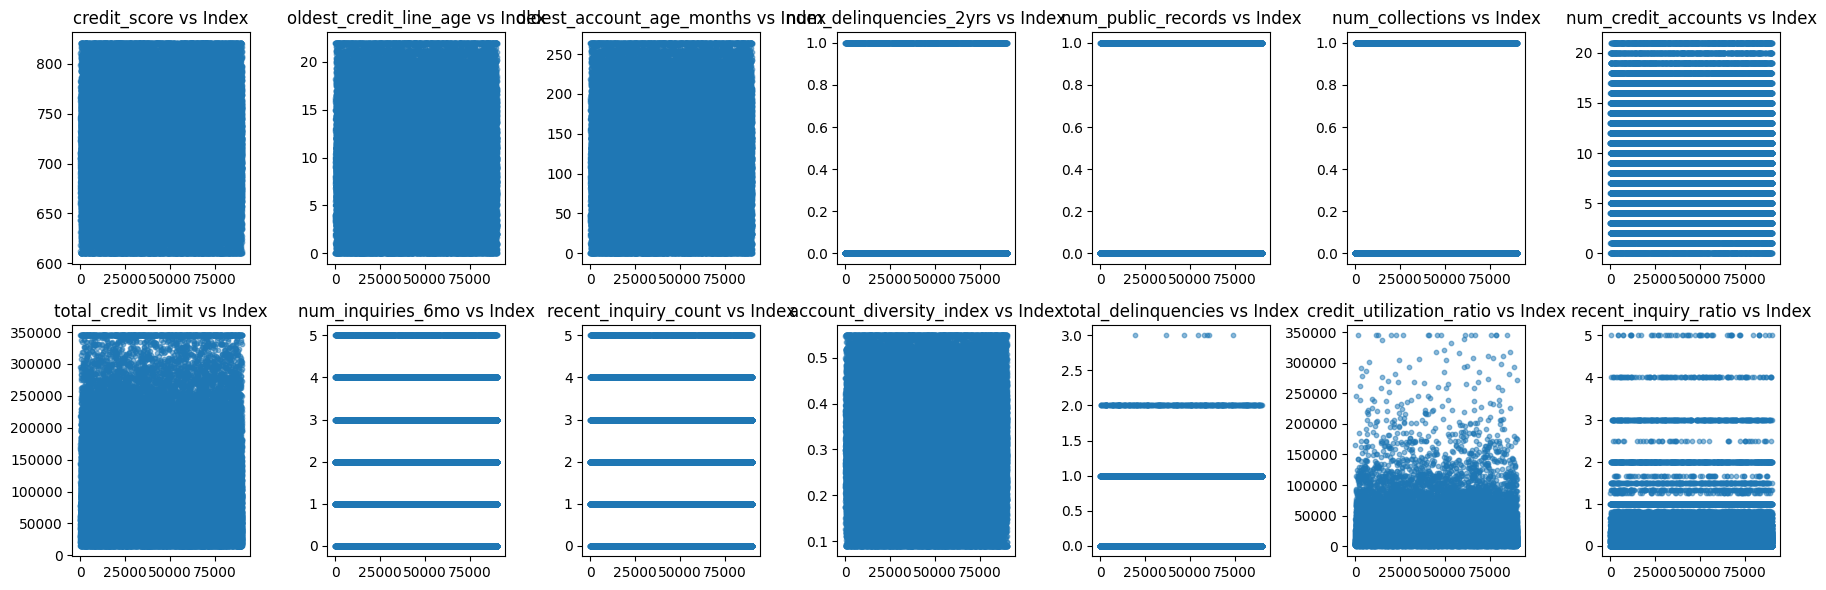

In [181]:
plt.figure(figsize=(18, 6))
for i, col in enumerate(credit_clipped.columns, 1):
    plt.subplot(2, 7, i)
    plt.scatter(credit_selected.index, credit_clipped[col], s=10, alpha=0.5)
    plt.title(f'{col} vs Index')
plt.tight_layout()
plt.show()


In [184]:
detect_outliers_iqr(credit_clipped, ['total_delinquencies', 'credit_utilization_ratio','recent_inquiry_ratio'])


Column: total_delinquencies
 - Q1: 0.0, Q3: 0.0, IQR: 0.0
 - Lower Bound: 0.0, Upper Bound: 0.0
 - Outliers count: 10488
 - Outlier values (sample up to 10): [1. 2. 3.]


Column: credit_utilization_ratio
 - Q1: 4821.428571428572, Q3: 16183.333333333334, IQR: 11361.904761904763
 - Lower Bound: -12221.428571428572, Upper Bound: 33226.19047619048
 - Outliers count: 7615
 - Outlier values (sample up to 10): [ 44500.         166000.          38950.          40475.
  67800.          60266.66666667  36700.          68980.
  49500.          66100.        ]


Column: recent_inquiry_ratio
 - Q1: 0.058823529411764705, Q3: 0.2857142857142857, IQR: 0.22689075630252098
 - Lower Bound: -0.28151260504201675, Upper Bound: 0.6260504201680672
 - Outliers count: 7194
 - Outlier values (sample up to 10): [0.66666667 1.         1.25       1.5        0.8        1.33333333
 5.         2.         4.         0.75      ]




In [185]:
def clip_new_features(df, cols, lower_pct=0.01, upper_pct=0.99):
    df_copy = df.copy()
    for col in cols:
        lower = df_copy[col].quantile(lower_pct)
        upper = df_copy[col].quantile(upper_pct)
        df_copy[col] = df_copy[col].clip(lower, upper)
        print(f"Clipping {col}: lower={lower}, upper={upper}")
    return df_copy

new_cols = ['total_delinquencies', 'credit_utilization_ratio', 'recent_inquiry_ratio']
credit_final_clipped = clip_new_features(credit_clipped, new_cols)


Clipping total_delinquencies: lower=0.0, upper=1.0
Clipping credit_utilization_ratio: lower=1349.9473684210527, upper=100806.00000000122
Clipping recent_inquiry_ratio: lower=0.0, upper=2.0


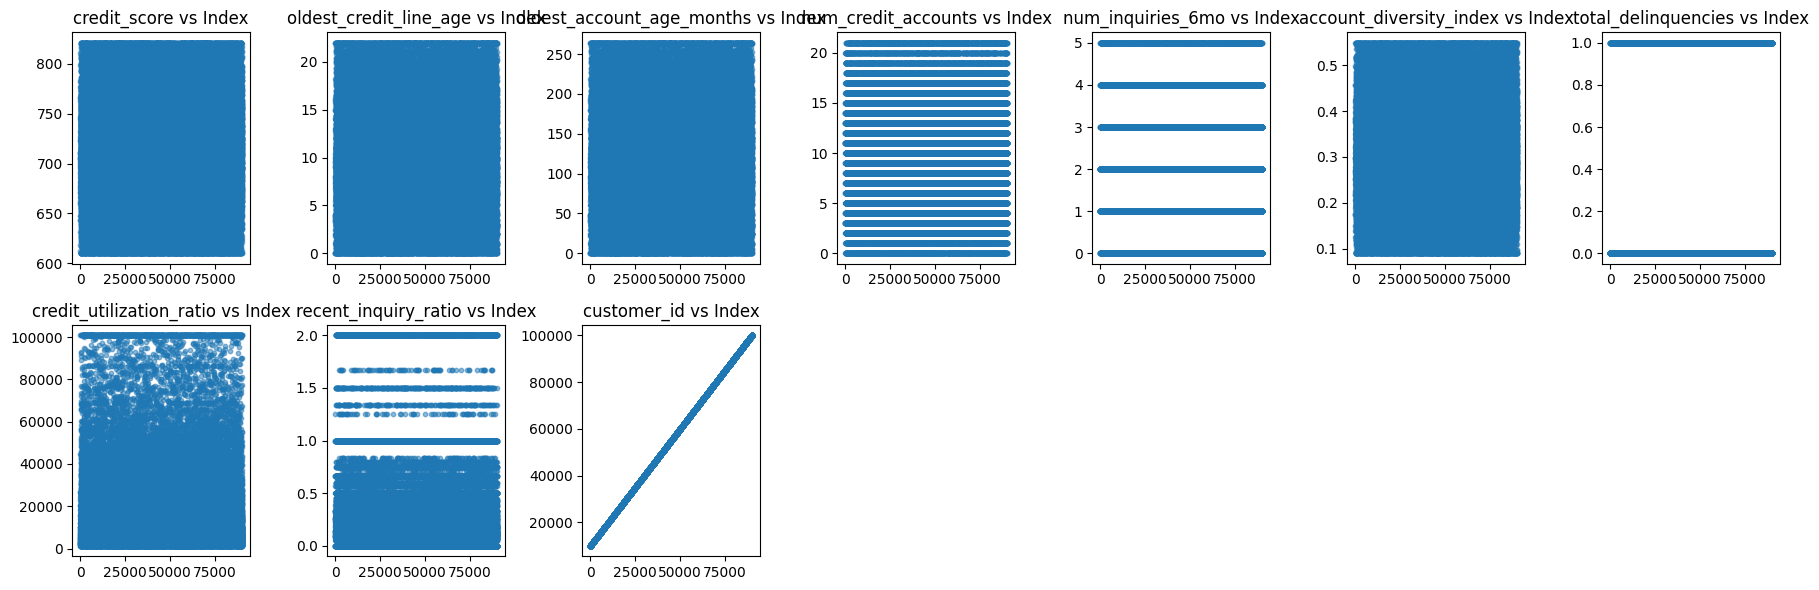

In [204]:
plt.figure(figsize=(18, 6))
for i, col in enumerate(credit_final_clipped.columns, 1):
    plt.subplot(2, 7, i)
    plt.scatter(credit_selected.index, credit_final_clipped[col], s=10, alpha=0.5)
    plt.title(f'{col} vs Index')
plt.tight_layout()
plt.show()


In [197]:
columns_to_drop = ['num_delinquencies_2yrs', 'num_public_records', 'num_collections',
                   'total_credit_limit', 'recent_inquiry_count']
credit_final = credit_clipped.drop(columns=columns_to_drop)


In [198]:
# credit_data.head()
credit_final['customer_id'] = credit_data['customer_number']

In [201]:
new_cols = ['total_delinquencies', 'credit_utilization_ratio', 'recent_inquiry_ratio']
credit_final_clipped = clip_new_features(credit_final, new_cols)

Clipping total_delinquencies: lower=0.0, upper=1.0
Clipping credit_utilization_ratio: lower=1349.9473684210527, upper=100806.00000000122
Clipping recent_inquiry_ratio: lower=0.0, upper=2.0


In [203]:
detect_outliers_iqr(credit_final_clipped, credit_final.columns)


Column: credit_score
 - Q1: 685.0, Q3: 748.0, IQR: 63.0
 - Lower Bound: 590.5, Upper Bound: 842.5
 - Outliers count: 0
 - No outliers detected.


Column: oldest_credit_line_age
 - Q1: 5.4, Q3: 12.9, IQR: 7.5
 - Lower Bound: -5.85, Upper Bound: 24.15
 - Outliers count: 0
 - No outliers detected.


Column: oldest_account_age_months
 - Q1: 64.80000000000001, Q3: 154.8, IQR: 90.0
 - Lower Bound: -70.19999999999999, Upper Bound: 289.8
 - Outliers count: 0
 - No outliers detected.


Column: num_credit_accounts
 - Q1: 6.0, Q3: 13.0, IQR: 7.0
 - Lower Bound: -4.5, Upper Bound: 23.5
 - Outliers count: 0
 - No outliers detected.


Column: num_inquiries_6mo
 - Q1: 1.0, Q3: 2.0, IQR: 1.0
 - Lower Bound: -0.5, Upper Bound: 3.5
 - Outliers count: 5873
 - Outlier values (sample up to 10): [5 4]


Column: account_diversity_index
 - Q1: 0.24, Q3: 0.38, IQR: 0.14
 - Lower Bound: 0.02999999999999997, Upper Bound: 0.5900000000000001
 - Outliers count: 0
 - No outliers detected.


Column: total_delinquenci

In [199]:
credit_final.head()

,credit_score,oldest_credit_line_age,oldest_account_age_months,num_credit_accounts,num_inquiries_6mo,account_diversity_index,total_delinquencies,credit_utilization_ratio,recent_inquiry_ratio,customer_id
0,696,22.0,264.0,14,2,0.499,1.0,12078.571429,0.142857,10000
1,659,3.5,42.0,13,5,0.298,0.0,6015.384615,0.384615,10001
2,662,0.0,0.0,3,2,0.174,0.0,13800.000000,0.666667,10002
3,676,9.0,108.0,8,1,0.263,0.0,7500.000000,0.125000,10003
4,678,8.0,96.0,7,1,0.298,0.0,7100.000000,0.142857,10004


In [205]:
credit_final.to_csv('credit_history_final.csv', index=False)

# **Loan Details(Part 3)**

In [209]:
loan_data = pd.read_excel("loan_details.xlsx")
loan_data.head()

,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,Personal,"$17,700",36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W
1,10001,mortgage,"$114,000",180,6.83,Refinance,0.774,Branch,1011,B
2,10002,Personal Loan,"9,300",36,13.99,Major Purchase,0.000,Online,1084,K
3,10003,PERSONAL,$8700,48,13.26,Medical,0.000,Online,1048,A
4,10004,Personal,"$7,200",24,10.77,Debt Consolidation,0.000,Branch,1055,S


In [210]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          89999 non-null  int64  
 1   loan_type            89999 non-null  object 
 2   loan_amount          89999 non-null  object 
 3   loan_term            89999 non-null  int64  
 4   interest_rate        89999 non-null  float64
 5   loan_purpose         89999 non-null  object 
 6   loan_to_value_ratio  89999 non-null  float64
 7   origination_channel  89999 non-null  object 
 8   loan_officer_id      89999 non-null  int64  
 9   marketing_campaign   89999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.9+ MB


In [211]:
loan_data.columns

Index(['customer_id', 'loan_type', 'loan_amount', 'loan_term', 'interest_rate',
       'loan_purpose', 'loan_to_value_ratio', 'origination_channel',
       'loan_officer_id', 'marketing_campaign'],
      dtype='object')

In [212]:
loan_data.describe()

,customer_id,loan_term,interest_rate,loan_to_value_ratio,loan_officer_id
count,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000
mean,54999.000000,132.369204,11.278835,0.273598,1045.791587
std,25980.617776,152.657187,4.607331,0.378284,32.327924
min,10000.000000,0.000000,2.500000,0.000000,995.000000
25%,32499.500000,12.000000,6.960000,0.000000,1010.000000
50%,54999.000000,48.000000,11.290000,0.000000,1048.000000
75%,77498.500000,360.000000,14.820000,0.725000,1077.000000
max,99998.000000,360.000000,22.800000,0.970000,1099.000000


In [215]:

# Numeric histograms
numeric_cols = ['loan_amount', 'loan_term', 'interest_rate', 'loan_to_value_ratio']
plt.figure(figsize=(14,8))
for i, c in enumerate(numeric_cols,1):
    plt.subplot(2,2,i)
    sns.histplot(loan_data[c].dropna(), bins=30, kde=True)
    plt.title(c)
plt.tight_layout()
plt.show()

# Scatter vs index
plt.figure(figsize=(14,6))
for i, c in enumerate(numeric_cols,1):
    plt.subplot(1,4,i)
    plt.scatter(loan_data.index, loan_data[c], s=8, alpha=0.5)
    plt.title(f"{c} vs index")
plt.tight_layout()
plt.show()

# Categorical counts
cat_cols = ['loan_type','loan_purpose','origination_channel']
plt.figure(figsize=(14,6))
for i, c in enumerate(cat_cols,1):
    plt.subplot(1,3,i)
    sns.countplot(y=loan_data[c], order=loan_data[c].value_counts().index[:20])
    plt.title(c)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [223]:
loan = loan_data.drop(['loan_officer_id'], axis=1).copy()

In [228]:
import re

def parse_money(value):
    """
    Converts strings like '$17,700' or '12,000' or '5500' to float.
    Returns NaN if conversion is impossible.
    """
    if pd.isna(value):
        return np.nan

    # Convert to string
    s = str(value).strip()

    # Remove currency symbols, commas, spaces
    s = re.sub(r'[^0-9.-]', '', s)

    # If empty after cleaning → NaN
    if s == '' or s == '-' or s == '--':
        return np.nan

    try:
        return float(s)
    except:
        return np.nan


In [229]:
loan['loan_amount'] = loan['loan_amount'].apply(parse_money)

In [230]:
numeric_cols = ['loan_amount', 'loan_term', 'interest_rate', 'loan_to_value_ratio']

In [231]:
loan

,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,marketing_campaign
0,10000,Personal,17700.0,36,12.50,Debt Consolidation,0.000,Direct Mail,W
1,10001,mortgage,114000.0,180,6.83,Refinance,0.774,Branch,B
2,10002,Personal Loan,9300.0,36,13.99,Major Purchase,0.000,Online,K
3,10003,PERSONAL,8700.0,48,13.26,Medical,0.000,Online,A
4,10004,Personal,7200.0,24,10.77,Debt Consolidation,0.000,Branch,S
...,...,...,...,...,...,...,...,...,...
89994,99994,personal,11300.0,24,9.70,Home Improvement,0.000,Branch,O
89995,99995,personal,16500.0,36,11.67,Other,0.000,Branch,D
89996,99996,Personal Loan,17800.0,36,14.99,Major Purchase,0.000,Online,J
89997,99997,Credit Card,11700.0,0,19.10,Revolving Credit,0.000,Branch,K


In [232]:
def detect_outliers_iqr(df, cols):
    report = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        out = df[(df[col] < lower) | (df[col] > upper)][col]
        report[col] = {
            'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
            'lower': lower, 'upper': upper,
            'outlier_count': len(out),
            'sample_outliers': out.unique()[:10].tolist()
        }
        print(f"Column: {col}\n - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f" - Lower Bound: {lower}, Upper Bound: {upper}")
        print(f" - Outliers count: {len(out)}")
        if len(out)>0:
            print(" - sample outliers:", out.unique()[:10])
        else:
            print(" - No outliers")
        print()
    return report

iqr_report = detect_outliers_iqr(loan, numeric_cols)


Column: loan_amount
 - Q1: 9800.0, Q3: 192800.0, IQR: 183000.0
 - Lower Bound: -264700.0, Upper Bound: 467300.0
 - Outliers count: 2582
 - sample outliers: [638300. 499100. 507500. 543200. 522900. 477300. 477400. 494100. 564500.
 491800.]

Column: loan_term
 - Q1: 12.0, Q3: 360.0, IQR: 348.0
 - Lower Bound: -510.0, Upper Bound: 882.0
 - Outliers count: 0
 - No outliers

Column: interest_rate
 - Q1: 6.96, Q3: 14.82, IQR: 7.86
 - Lower Bound: -4.830000000000001, Upper Bound: 26.61
 - Outliers count: 0
 - No outliers

Column: loan_to_value_ratio
 - Q1: 0.0, Q3: 0.725, IQR: 0.725
 - Lower Bound: -1.0875, Upper Bound: 1.8125
 - Outliers count: 0
 - No outliers



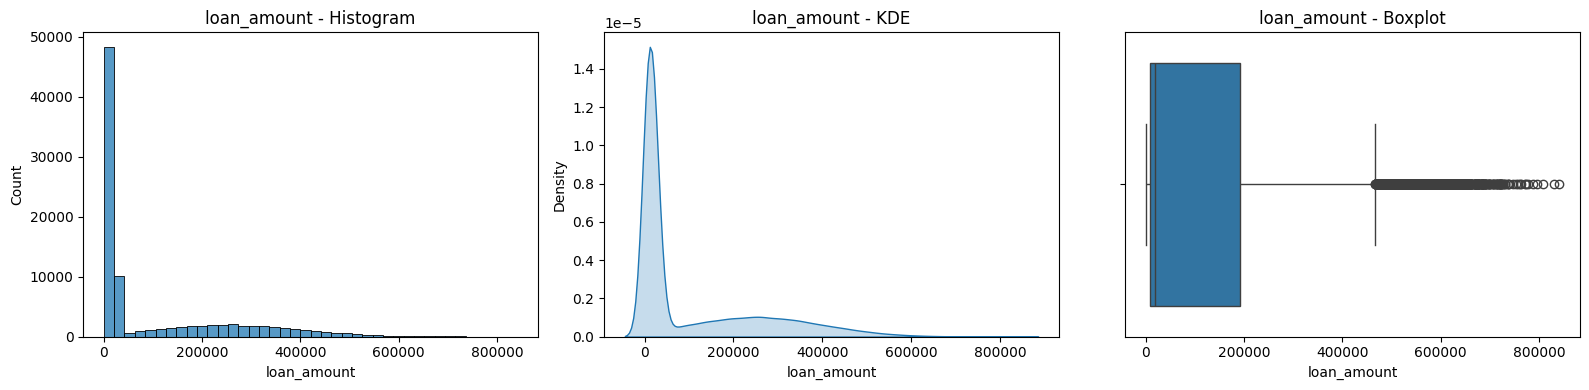

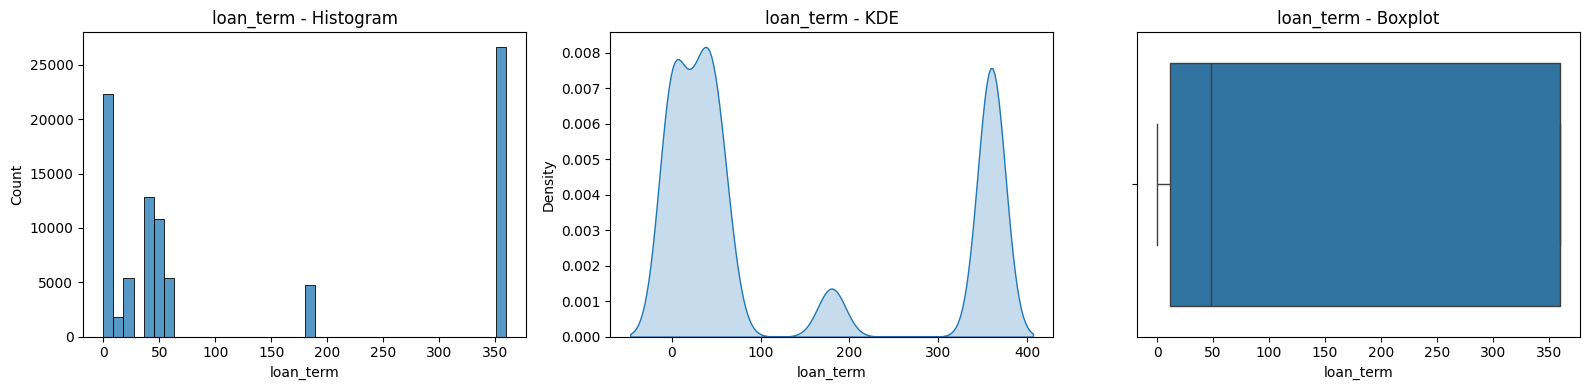

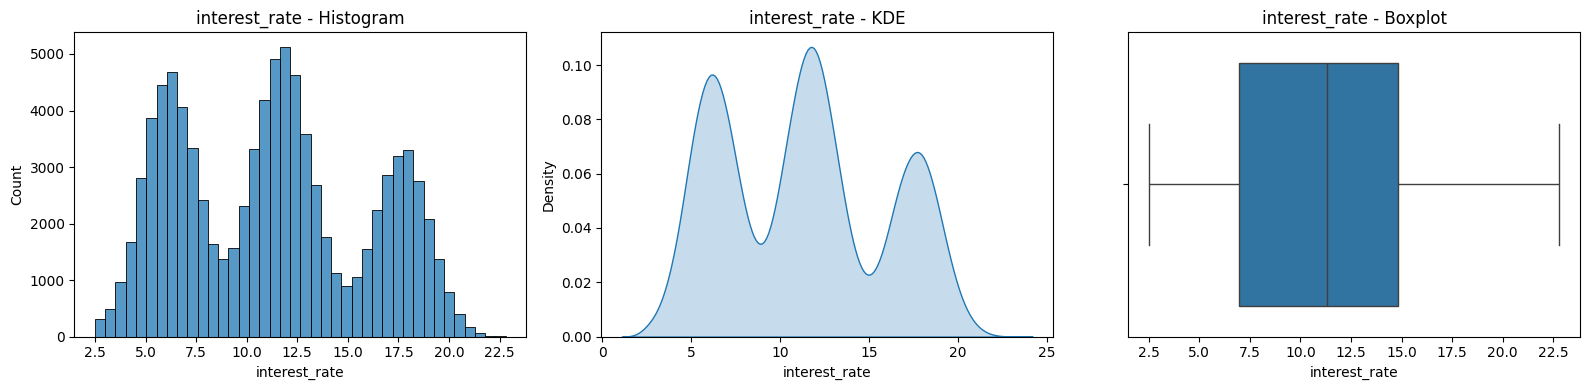

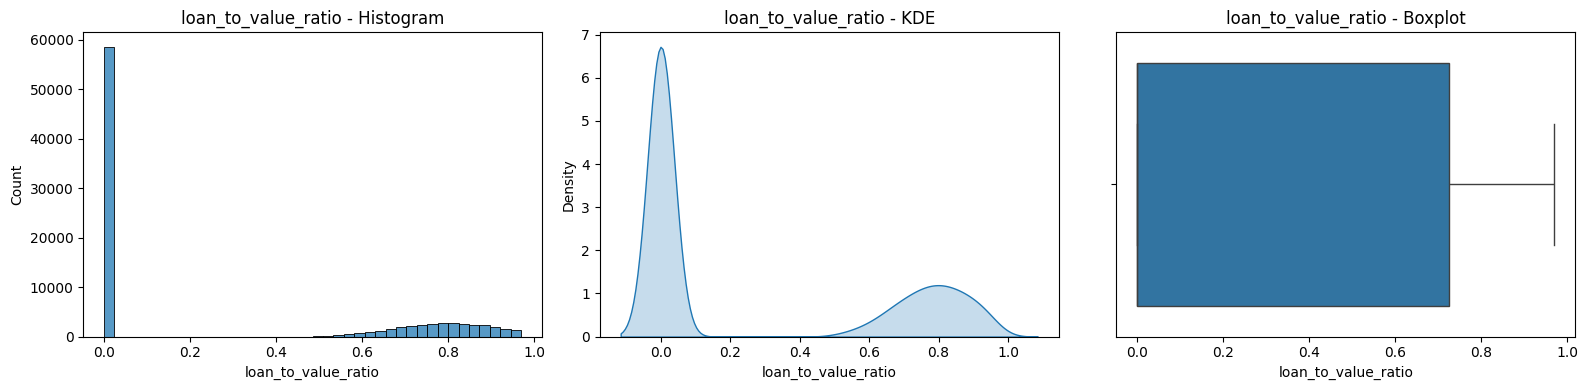

In [233]:


def visualize_column(df, col):
    data = df[col].dropna()

    plt.figure(figsize=(16, 4))

    # 1. Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data, bins=40, kde=False)
    plt.title(f"{col} - Histogram")

    # 2. KDE (smooth distribution curve)
    plt.subplot(1, 3, 2)
    sns.kdeplot(data, fill=True)
    plt.title(f"{col} - KDE")

    # 3. Boxplot (for outlier inspection)
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data)
    plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

# ---- Run for each numeric loan column ----
numeric_cols = [
    "loan_amount",
    "loan_term",
    "interest_rate",
    "loan_to_value_ratio"
]

for col in numeric_cols:
    visualize_column(loan, col)


In [235]:
loan['loan_type'].value_counts().index

Index(['Personal', 'Personal Loan', 'personal', 'PERSONAL', 'Mortgage',
       'Home Loan', 'MORTGAGE', 'mortgage', 'Credit Card', 'CreditCard',
       'credit card', 'CC'],
      dtype='object', name='loan_type')

In [236]:
def clean_loan_type(x):
    if pd.isna(x):
        return "Unknown"

    x = str(x).strip().lower()

    # Personal loan variations
    if x in ["personal", "personal loan", "personalloan", "personal_loans"]:
        return "Personal Loan"

    # Mortgage variations
    if x in ["mortgage", "home loan", "homeloan"]:
        return "Mortgage"

    # Credit card variations
    if x in ["credit card", "creditcard", "cc"]:
        return "Credit Card"

    return "Other"   # fallback category

loan["loan_type_clean"] = loan["loan_type"].apply(clean_loan_type)


In [237]:
loan

,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,marketing_campaign,loan_type_clean
0,10000,Personal,17700.0,36,12.50,Debt Consolidation,0.000,Direct Mail,W,Personal Loan
1,10001,mortgage,114000.0,180,6.83,Refinance,0.774,Branch,B,Mortgage
2,10002,Personal Loan,9300.0,36,13.99,Major Purchase,0.000,Online,K,Personal Loan
3,10003,PERSONAL,8700.0,48,13.26,Medical,0.000,Online,A,Personal Loan
4,10004,Personal,7200.0,24,10.77,Debt Consolidation,0.000,Branch,S,Personal Loan
...,...,...,...,...,...,...,...,...,...,...
89994,99994,personal,11300.0,24,9.70,Home Improvement,0.000,Branch,O,Personal Loan
89995,99995,personal,16500.0,36,11.67,Other,0.000,Branch,D,Personal Loan
89996,99996,Personal Loan,17800.0,36,14.99,Major Purchase,0.000,Online,J,Personal Loan
89997,99997,Credit Card,11700.0,0,19.10,Revolving Credit,0.000,Branch,K,Credit Card


In [239]:
# !pip install fuzzywuzzy python-Levenshtein

In [240]:
from fuzzywuzzy import process

# Example raw values
loan_types = ['Personal', 'Personal Loan', 'personal', 'PERSONAL',
              'Mortgage', 'Home Loan', 'MORTGAGE', 'mortgage',
              'Credit Card', 'CreditCard', 'credit card', 'CC']

# Step 1: lowercase + strip spaces
loan_types_clean = [x.lower().strip() for x in loan_types]

# Step 2: define main categories
categories = ['personal', 'mortgage', 'credit_card']

# Step 3: map each value to closest category using fuzzy matching
def map_to_category(value):
    best_match = process.extractOne(value, categories)[0]
    return best_match

loan_types_mapped = [map_to_category(x) for x in loan_types_clean]
print(loan_types_mapped)


['personal', 'personal', 'personal', 'personal', 'mortgage', 'personal', 'mortgage', 'mortgage', 'credit_card', 'credit_card', 'credit_card', 'credit_card']


In [241]:
# Normalize
loan['loan_type_clean'] = loan['loan_type'].str.lower().str.strip()

# Map using fuzzy matching
loan['loan_type_clean'] = loan['loan_type_clean'].apply(map_to_category)


In [243]:
loan['loan_type_clean'].value_counts()


,count
loan_type_clean,
personal,44082
mortgage,23579
credit_card,22338
